<a href="https://colab.research.google.com/github/hongkwangpyo/2020_dip_learning/blob/master/0810_2_keras_DDN_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from collections import Counter

from sklearn.preprocessing import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.xls to Concrete_Data.xls


In [3]:
df = pd.read_excel('Concrete_Data.xls')
df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
df.columns = ['cement ', 'slag ', 'ash ', 'water', 'plastic', 'coagg', 'finagg', 'age', 'strength']
df.head(2)

,cement,slag,ash,water,plastic,coagg,finagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [8]:
y = df.strength
x = df.drop('strength', axis=1)

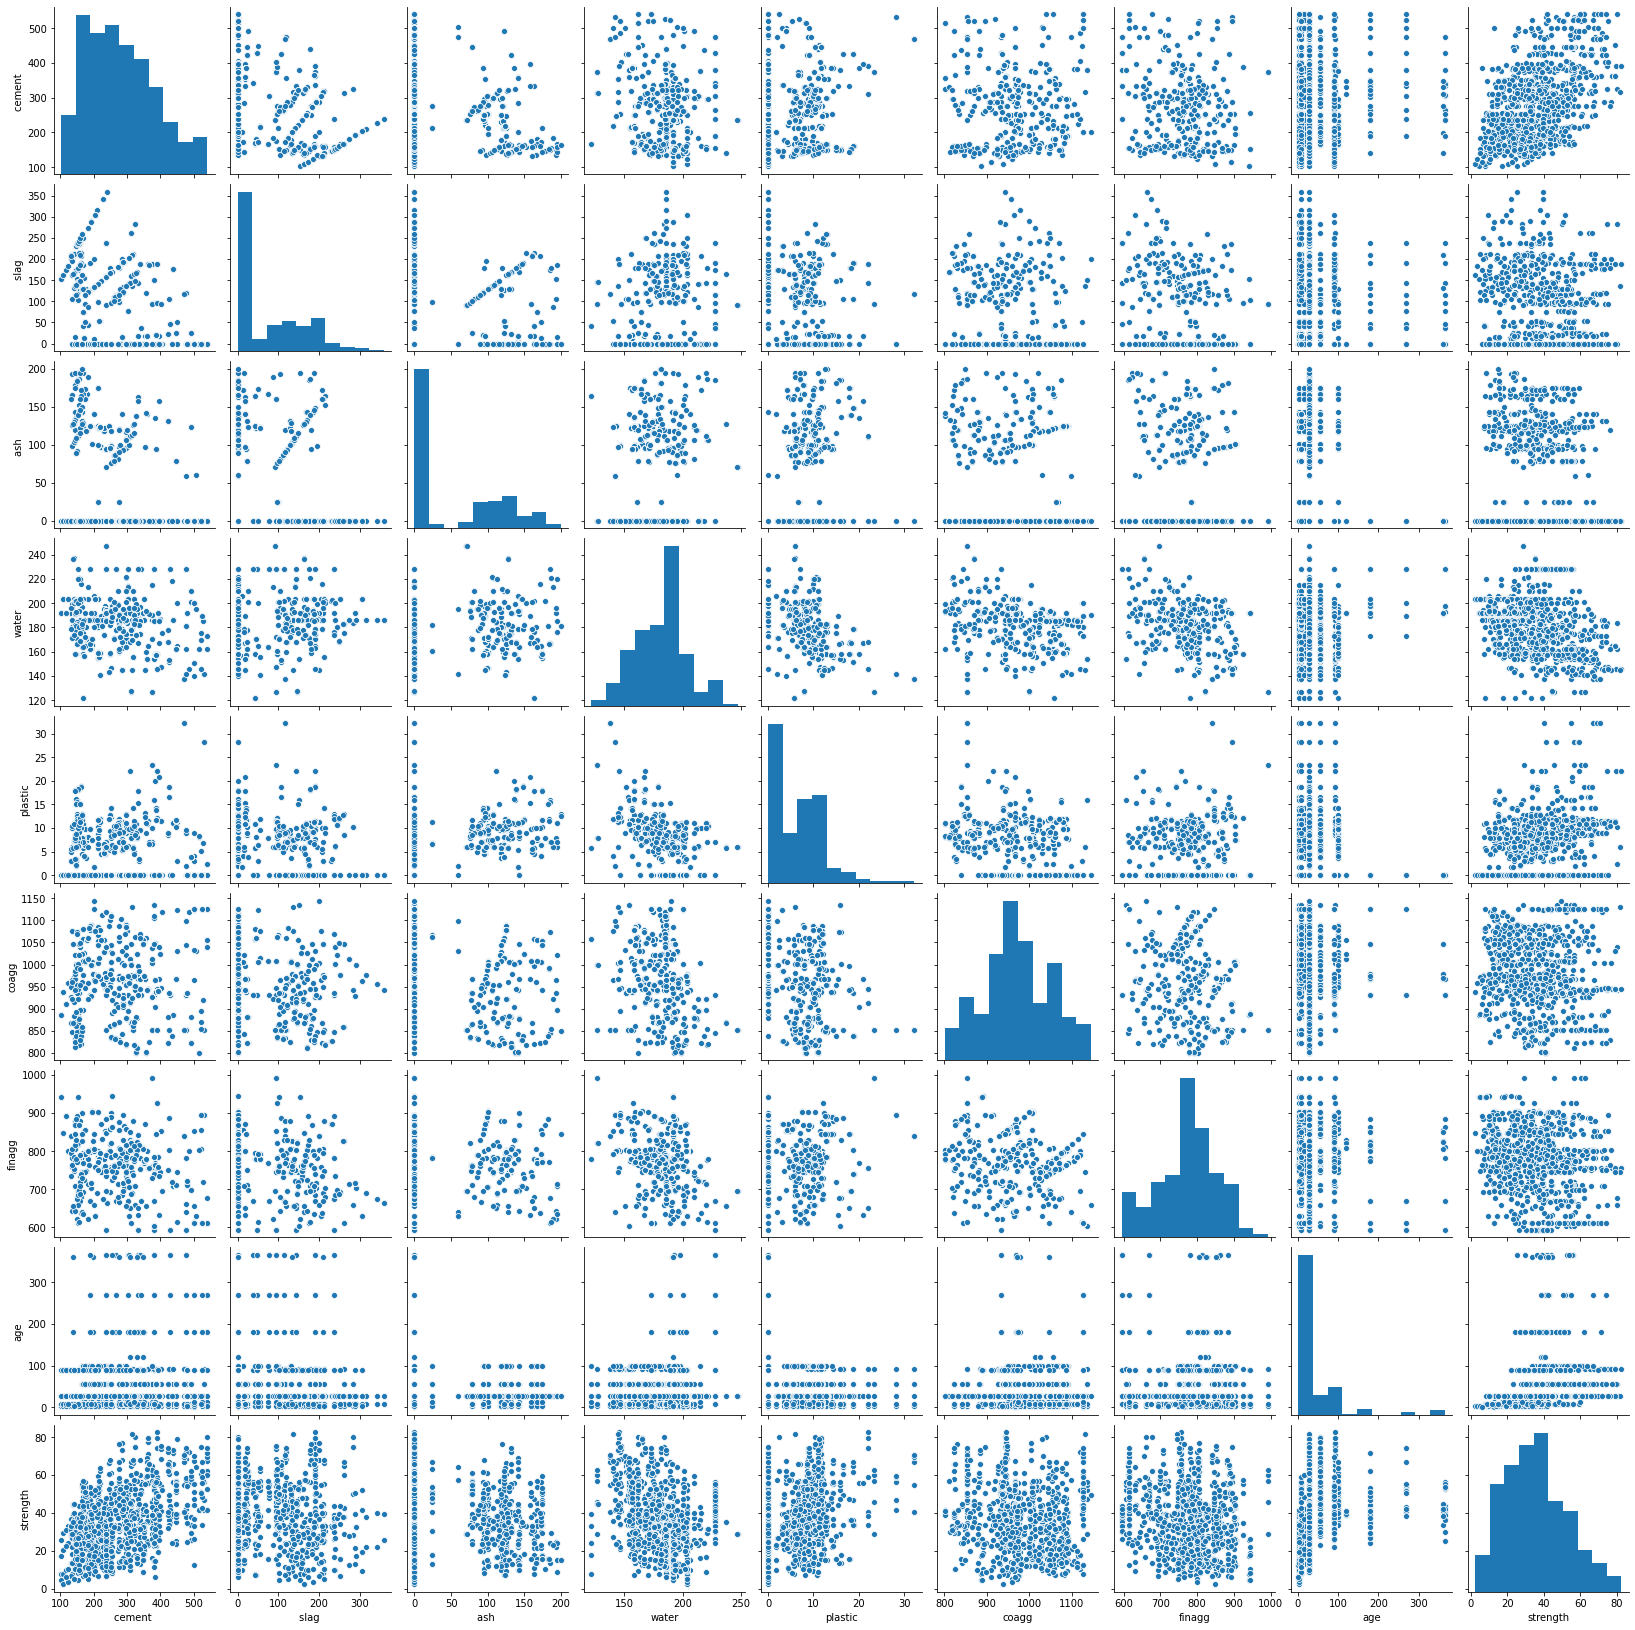

In [9]:
sns.pairplot(df)

In [20]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mse', optimizer='adam') 

In [19]:
##############################################
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [23]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 1468.5417 - val_loss: 1566.4233
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 1057.1138 - val_loss: 692.0664
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 343.1812 - val_loss: 245.2959
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 241.5495 - val_loss: 228.4107
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 203.8841 - val_loss: 202.2155
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 175.9517 - val_loss: 174.6338
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 152.3695 - val_loss: 159.6012
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 135.2647 - val_loss: 151.8547
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 124.8086 - val_loss: 139.7491
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - lo

In [24]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

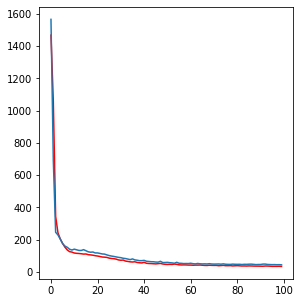

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r') 
plt.plot(hist.history['val_loss']) 

In [26]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 35.6513


35.65129470825195